# Q1 - Employee Retention Rate - Cohort Analysis
Given a dataset of employees, we're asked to do a yearly cohort analysis for employee retention. Cohort analysis is a type of behavioural analysis that groups the targeted users based on their shared traits to analyze a specific pattern. The shared trait here is the year employees started working at, and the pattern in question is about the amount of time they stayed in their job. \
In the next steps, we're going to analyze the dataset and visualize our results.

# Step 1. Import the required packages & load the dataset
As the first step, we're going to import some very popular python packages for data analysis, and load our dataset.

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('/kaggle/input/personal-data/Personal data.xlsx', sheet_name='Sheet1', header=0)

# Step 2. Get to know the dataset

Here, we're going to take a look at our dataset size, the columns & their types.\
Also, we're going to see if there are any null values. As mentioned in the instruction, the "End_Date" column does have some null values, meaning there are employees who are still working in their positions. 

In [2]:
print('Dataset Size:' , df.shape)
print('\nDataset Information:')
df.info()

Dataset Size: (426, 6)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Employee_id  426 non-null    int64         
 1   Department   426 non-null    object        
 2   Team         426 non-null    object        
 3   Level        426 non-null    object        
 4   Start_Date   424 non-null    datetime64[ns]
 5   End_Date     96 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 20.1+ KB


As we can see, "End_Date" has some null values. But what we also see here is that we have 424 non-null value for "Start_Date", meaning there are two employees whose start dates we're not aware of.\
Also, "Start_Date" and "End_Date" have the "datetime" data type, which is exactly what we need. \
Next, we're going to handle these null values.

# Step 3. Data Pre-processing
For this step, we're first going to handle the missing values in "Start_Date". Since there are only two employees with this condition, which is a very small fraction of our dataset (which contains 426 employees' information, so basically less than 1%), and we need our dataset to be specifically reliable and complete, we'll remove these rows. 

In [3]:
df.dropna(subset=['Start_Date'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 0 to 425
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Employee_id  424 non-null    int64         
 1   Department   424 non-null    object        
 2   Team         424 non-null    object        
 3   Level        424 non-null    object        
 4   Start_Date   424 non-null    datetime64[ns]
 5   End_Date     96 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 23.2+ KB



In addition, we're going to only replace the rows that do not have an "End_date" value with the current date, meaning these employees are still working in their positions. We're going to need this to consider employees who are still working in our cohorts.

In [4]:
df['End_Date'] = pd.to_datetime(df['End_Date'].fillna(dt.datetime.today().date()))

df.head(3)

,Employee_id,Department,Team,Level,Start_Date,End_Date
0,10001,HR,TeamA,Junior,2022-01-01,2024-05-07
1,10002,IT,TeamB,Senior,2022-01-05,2024-05-07
2,10003,Finance,TeamC,Analyst,2022-02-10,2024-05-07


All done! We've got today's date instead of null.

# Step 4. Extract start year and end year for each employee
Since we're going to base our analysis on yearly timeframes, we'll extract the start year and end year of work for each employee into new columns called "Start_Year" and "End_Year", to access them easier and more efficiently.     

In [5]:
df['Start_Year'] = df['Start_Date'].dt.year
df['End_Year'] = df['End_Date'].dt.year 

# Step 5. Calculate cohort sizes
To do a cohort analysis, we need to divide people to cohorts (aka, groups) with similar traits to identify patterns in user behaviors & actions. So, we're going to determine our cohorts and calculate each of their sizes. In this case, our cohorts are divided by the years the employees started their jobs (Their shared trait is the year they've started working in).

In [6]:
cohort_size = df.groupby('Start_Year').Employee_id.nunique().reset_index().rename(columns={'Employee_id' : 'cohort_size'})
print(cohort_size)

   Start_Year  cohort_size
0        2019           31
1        2020           60
2        2021           72
3        2022          119
4        2023          130
5        2024           12


As expected, we have 6 cohorts, each representing a year in our dataset.

# Step 6. Create a pivot table representing retention based on start date
In this step, we'll use a pivot table to see the retention rates of each cohort for different years.

In [7]:
pivot_count = pd.pivot_table(df , values='Employee_id' , index='Start_Year' , columns='End_Year' , aggfunc='size').fillna(0)
print(pivot_count)

End_Year    2019  2020  2021  2022  2023   2024
Start_Year                                     
2019         5.0   5.0   3.0   2.0   3.0   13.0
2020         0.0   1.0   6.0   1.0   2.0   50.0
2021         0.0   0.0   3.0  11.0   3.0   55.0
2022         0.0   0.0   0.0   8.0  30.0   81.0
2023         0.0   0.0   0.0   0.0  10.0  120.0
2024         0.0   0.0   0.0   0.0   0.0   12.0


# Step 7. Merge cohort sizes into the table & calculate the retention rates
Next, let's merge this table with cohort sizes to calculate the % of retentions.

In [8]:
pivot_count = pd.merge(pivot_count ,cohort_size , how='inner' , on='Start_Year').set_index('Start_Year')
print(pivot_count)

            2019  2020  2021  2022  2023   2024  cohort_size
Start_Year                                                  
2019         5.0   5.0   3.0   2.0   3.0   13.0           31
2020         0.0   1.0   6.0   1.0   2.0   50.0           60
2021         0.0   0.0   3.0  11.0   3.0   55.0           72
2022         0.0   0.0   0.0   8.0  30.0   81.0          119
2023         0.0   0.0   0.0   0.0  10.0  120.0          130
2024         0.0   0.0   0.0   0.0   0.0   12.0           12


In [9]:
retention_rate = pd.DataFrame(pivot_count)

retention_rate = retention_rate.iloc[:, :-1].div(pivot_count['cohort_size'], axis=0).round(2)

print(retention_rate)

            2019  2020  2021  2022  2023  2024
Start_Year                                    
2019        0.16  0.16  0.10  0.06  0.10  0.42
2020        0.00  0.02  0.10  0.02  0.03  0.83
2021        0.00  0.00  0.04  0.15  0.04  0.76
2022        0.00  0.00  0.00  0.07  0.25  0.68
2023        0.00  0.00  0.00  0.00  0.08  0.92
2024        0.00  0.00  0.00  0.00  0.00  1.00


# Step 8. Create a heatmap to better illustarte this analysis
Lastly, we'll use a heatmap to better visualize retention rates based on cohorts.

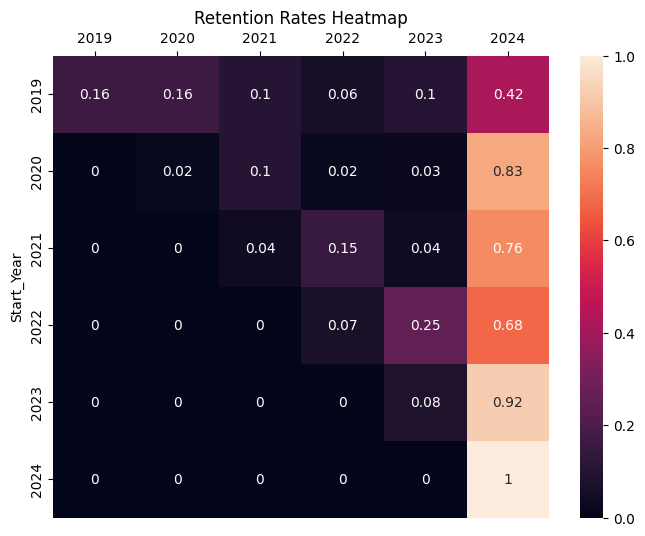

In [10]:
plt.figure(figsize=(8, 6))
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.heatmap(retention_rate , annot=True , mask=retention_rate.isnull())
plt.title('Retention Rates Heatmap')
plt.xticks(rotation=90)  
plt.gca().xaxis.tick_top()  
plt.gca().xaxis.set_label_position('top')
plt.show()